In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Layer, BatchNormalization, GlobalAveragePooling2D 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from PIL import Image 
import cv2
import os
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

In [2]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd

In [3]:
np.random.seed(1)
tf.random.set_seed(1)

(445, 590, 3)


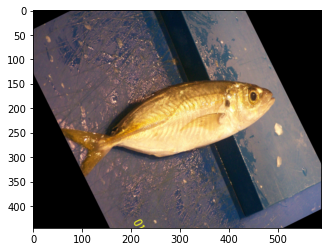

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00181.png')
print(img.shape)
imgplot = plt.imshow(img)
plt.show()

In [5]:
MAIN_DIR = "Fish_Dataset/"
fish_classes = [name for name in os.listdir(MAIN_DIR) if os.path.isdir(os.path.join(MAIN_DIR, name))]
fish_classes

['Black Sea Sprat',
 'Gilt-Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [6]:
image_files = []
image_classes = []
import pdb
for f_class in fish_classes:
    for files in os.listdir(os.path.join(MAIN_DIR,f_class,f_class)):
        image_files.append(os.path.join(MAIN_DIR,f_class,f_class,files))
        image_classes.append(f_class)

In [7]:
fish_data = pd.DataFrame({'path':image_files, 'class':image_classes, })
# generate binary values using get_dummies
dum_df = pd.get_dummies(fish_data["class"], prefix="label")
label_columns = dum_df.columns
# merge with main df bridge_df on key values
fish_data = fish_data.join(dum_df)
fish_data

,path,class,label_Black Sea Sprat,label_Gilt-Head Bream,label_Hourse Mackerel,label_Red Mullet,label_Red Sea Bream,label_Sea Bass,label_Shrimp,label_Striped Red Mullet,label_Trout
0,Fish_Dataset/Black Sea Sprat\Black Sea Sprat\0...,Black Sea Sprat,1,0,0,0,0,0,0,0,0
1,Fish_Dataset/Black Sea Sprat\Black Sea Sprat\0...,Black Sea Sprat,1,0,0,0,0,0,0,0,0
2,Fish_Dataset/Black Sea Sprat\Black Sea Sprat\0...,Black Sea Sprat,1,0,0,0,0,0,0,0,0
3,Fish_Dataset/Black Sea Sprat\Black Sea Sprat\0...,Black Sea Sprat,1,0,0,0,0,0,0,0,0
4,Fish_Dataset/Black Sea Sprat\Black Sea Sprat\0...,Black Sea Sprat,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1795,Fish_Dataset/Trout\Trout\00196.png,Trout,0,0,0,0,0,0,0,0,1
1796,Fish_Dataset/Trout\Trout\00197.png,Trout,0,0,0,0,0,0,0,0,1
1797,Fish_Dataset/Trout\Trout\00198.png,Trout,0,0,0,0,0,0,0,0,1
1798,Fish_Dataset/Trout\Trout\00199.png,Trout,0,0,0,0,0,0,0,0,1


In [8]:
train_data , test_data = train_test_split(fish_data, test_size=0.15, stratify=fish_data["class"])

In [9]:
model = Sequential([
    Conv2D(128,(3,3),input_shape = (267, 354,3)),
    MaxPooling2D(),
    Conv2D(64, (3,3)),    
    MaxPooling2D(),
    Flatten(),
    Dropout(0.3),
    Dense(32, activation = 'relu'),
    Dropout(0.3),
    Dense(9, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 265, 352, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 132, 176, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 130, 174, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 65, 87, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 361920)            0         
_________________________________________________________________
dropout (Dropout)            (None, 361920)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                1

In [10]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split= 0.17)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_dataframe(
    train_data,  x_col='path', y_col=label_columns,
    target_size=(267, 354), color_mode='rgb',
    class_mode='raw', batch_size=64, subset='training',seed = 1
    
    )
val_generator = train_datagen.flow_from_dataframe(
    train_data,  x_col='path', y_col=label_columns,
    target_size=(267, 354), color_mode='rgb',
    class_mode='raw', batch_size=64,subset='validation',seed = 1
        )

test_generator = test_datagen.flow_from_dataframe(
    test_data, x_col='path', y_col=label_columns,
    target_size=(267, 354), color_mode='rgb',seed = 1,
    class_mode="raw", batch_size=64,shuffle=False
    )

Found 1270 validated image filenames.
Found 260 validated image filenames.
Found 270 validated image filenames.


In [ ]:
tf.keras.backend.clear_session()
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00001)
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate=0.0005), metrics = ["accuracy"])
model_history = model.fit(train_generator,epochs=15,callbacks = [reduce_lr],validation_data = val_generator)

Epoch 1/15
 4/20 [=====>........................] - ETA: 36:48 - loss: 5.0532 - accuracy: 0.140 - ETA: 51:24 - loss: 5.0602 - accuracy: 0.135 - ETA: 40:57 - loss: 4.3379 - accuracy: 0.1367

In [ ]:
scoreSeg = model.evaluate(x=test_generator,verbose =1)

In [ ]:
# scoreSeg

In [ ]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
EPOCHS =15
epochs = range(EPOCHS)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

In [ ]:
test_predictions = model.predict(test_generator)
test_predictions = np.argmax(test_predictions, axis=1)

In [ ]:
test_gt = np.argmax(test_generator.labels, axis=1)
test_gt

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_gt, test_predictions))

In [ ]:
#save model
MODEL_BASE_PATH = "model"
PROJECT_NAME = "fish_project"
SAVE_MODEL_NAME = "model.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

In [ ]:
#load model to use
from tensorflow.keras.models import load_model
MODEL_PATH = 'model/fish_project/model.h5'
model = load_model(MODEL_PATH,compile=False)